# **Real Estate Price Prediction & Market Insights Dashboard**

### **Real Estate Price Prediction & Market Insights Dashboard:** An end-to-end machine learning project that predicts housing prices and provides interactive market insights through geospatial analysis and a deployed dashboard. DataSet From -> https://www.kaggle.com/datasets/fratzcan/usa-house-prices


### **Library Installation**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib, json
from scipy import stats

from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import randint, uniform, loguniform
from statsmodels.tsa.statespace.sarimax import SARIMAX

### **Data Collection**

In [29]:
# DATA LOAD

# If the file is found, a success message is printed. -> CSV file loaded successfully.
# If the file is not found, a specific error message is displayed for 'FileNotFoundError' -> Error: The file 'USA Housing Dataset.csv' was not found.
# Any other unexpected errors are caught by 'Exception' and the error message is printed. -> An unexpected error occurred & it will display the Error

# def load_data(file_path):
try:
     DataFrame = pd.read_csv("USA Housing Dataset.csv")
     print(f"CSV File loaded Sucessfully")

except FileNotFoundError:
    print("Error: The file was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

CSV File loaded Sucessfully


#### Displaying the first few rows of the data

In [30]:
# Using a display function to print out what I have in out dataset like first few rows and column
display(DataFrame)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [31]:
print("Shape of dataset (rows, columns):", DataFrame.shape)

Shape of dataset (rows, columns): (4140, 18)


In [32]:
print("\nColumn names:\n", DataFrame.columns.tolist())


Column names:
 ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


## **Data Cleaning**

#### Let copy dataframe to avoid overwriting raw data

In [33]:
DataFrame_Sample = DataFrame.copy()

# Handle missing values
print("Missing values before:", DataFrame_Sample.isnull().sum().sum())
DataFrame = DataFrame.dropna()
print("Missing values after:", DataFrame_Sample.isnull().sum().sum())

Missing values before: 0
Missing values after: 0


##### This shows that we don't have any missing values to treat

##### Quick Check for missing column

In [34]:
# Check for missing values
print("\nMissing values per column:")
print(DataFrame_Sample.isnull().sum())


Missing values per column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


##### **Exploratory Data Analysis (EDA)**

In [35]:
# Basic summary about the price column
print(DataFrame_Sample['price'].describe())

count    4.140000e+03
mean     5.530629e+05
std      5.836865e+05
min      0.000000e+00
25%      3.200000e+05
50%      4.600000e+05
75%      6.591250e+05
max      2.659000e+07
Name: price, dtype: float64


##### Houses in the dataset typically have 3–4 bedrooms, 2–2.5 bathrooms, approximately 1.5 floors, a median size of approximately 1,980 sqft on approximately 7,676 sqft lots, with most never renovated, waterfront properties being rare (approximately 0.75%), and prices strongly right-skewed with a median of $460k, average of $553k, and a max luxury outlier of $26.59M.

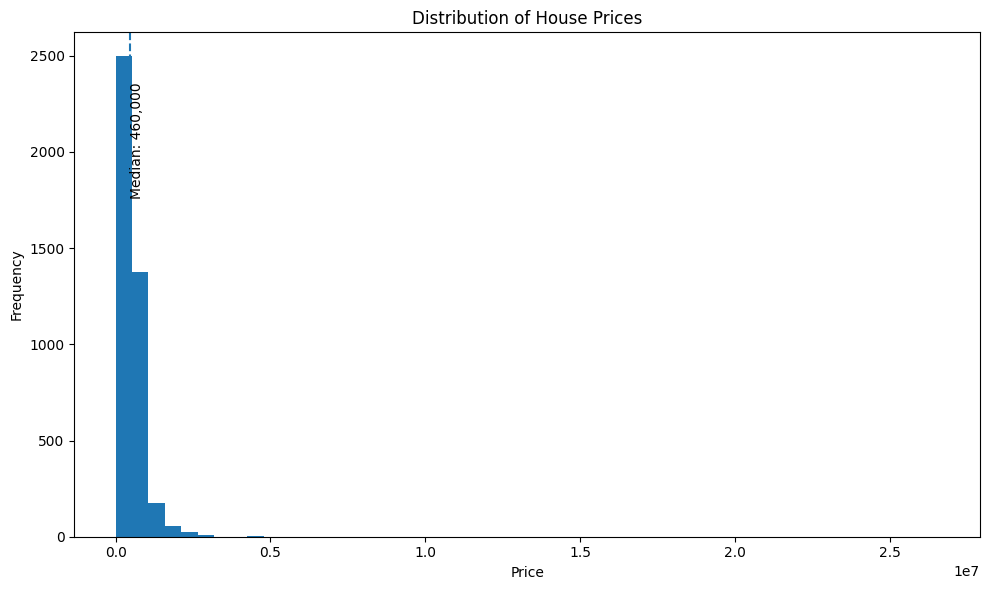

In [36]:
# Plot histogram of prices
plt.figure(figsize=(10,6))
plt.hist(DataFrame['price'], bins=50)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Add a median reference line
median_price = DataFrame['price'].median()
plt.axvline(median_price, linestyle="--")
plt.text(median_price, plt.ylim()[1]*0.9, f"Median: {median_price:,.0f}", rotation=90, va="top")

plt.tight_layout()
plt.show()

##### This plots house prices as a histogram and marks the median.

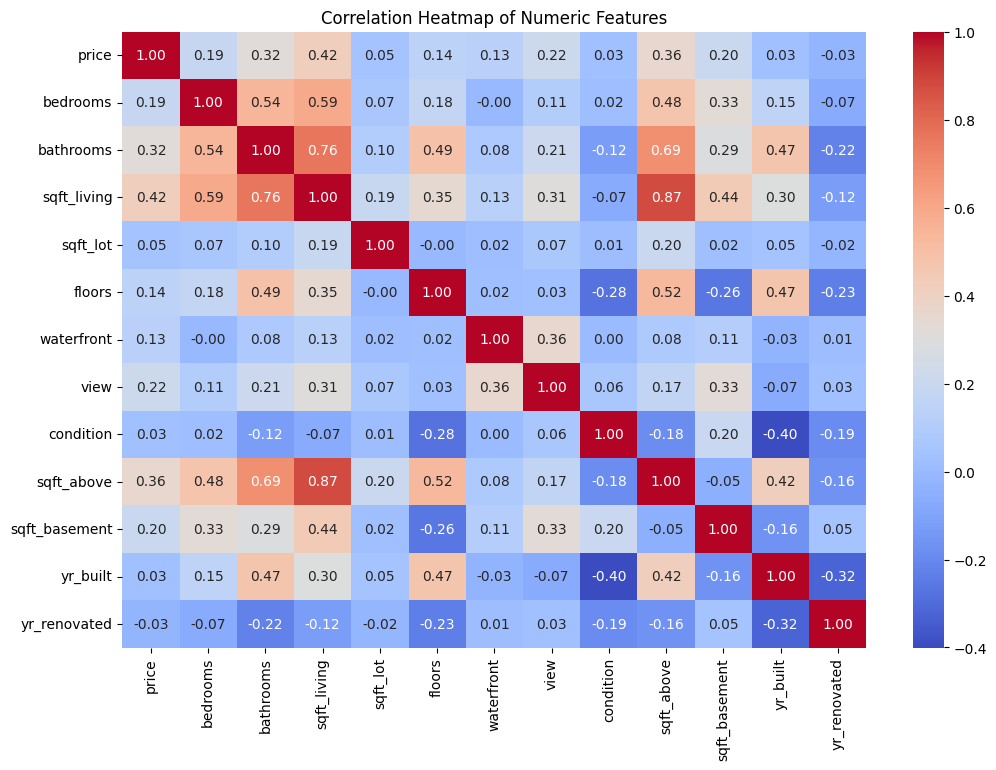

In [37]:
# Correlation heatmap for numeric features vs price

# Select only numeric columns
numeric_df = DataFrame_Sample.select_dtypes(include=['int64', 'float64'])

# Compute correlations
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

##### The heatmap shows that house price is most strongly correlated with living area size (sqft_living) and above-ground square footage (sqft_above), while other features show weaker relationships.

In [38]:
# Also show top correlations with price
print(corr['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.418528
sqft_above       0.355214
bathrooms        0.317785
view             0.217553
sqft_basement    0.204066
bedrooms         0.188765
floors           0.143180
waterfront       0.131401
sqft_lot         0.045964
condition        0.030327
yr_built         0.027067
yr_renovated    -0.028272
Name: price, dtype: float64


##### **Correlation insights**: House price is most strongly correlated with living area size (sqft_living), number of bathrooms, and number of bedrooms, while lot size has weaker influence.

#### **Regression plots of price vs all numeric features**

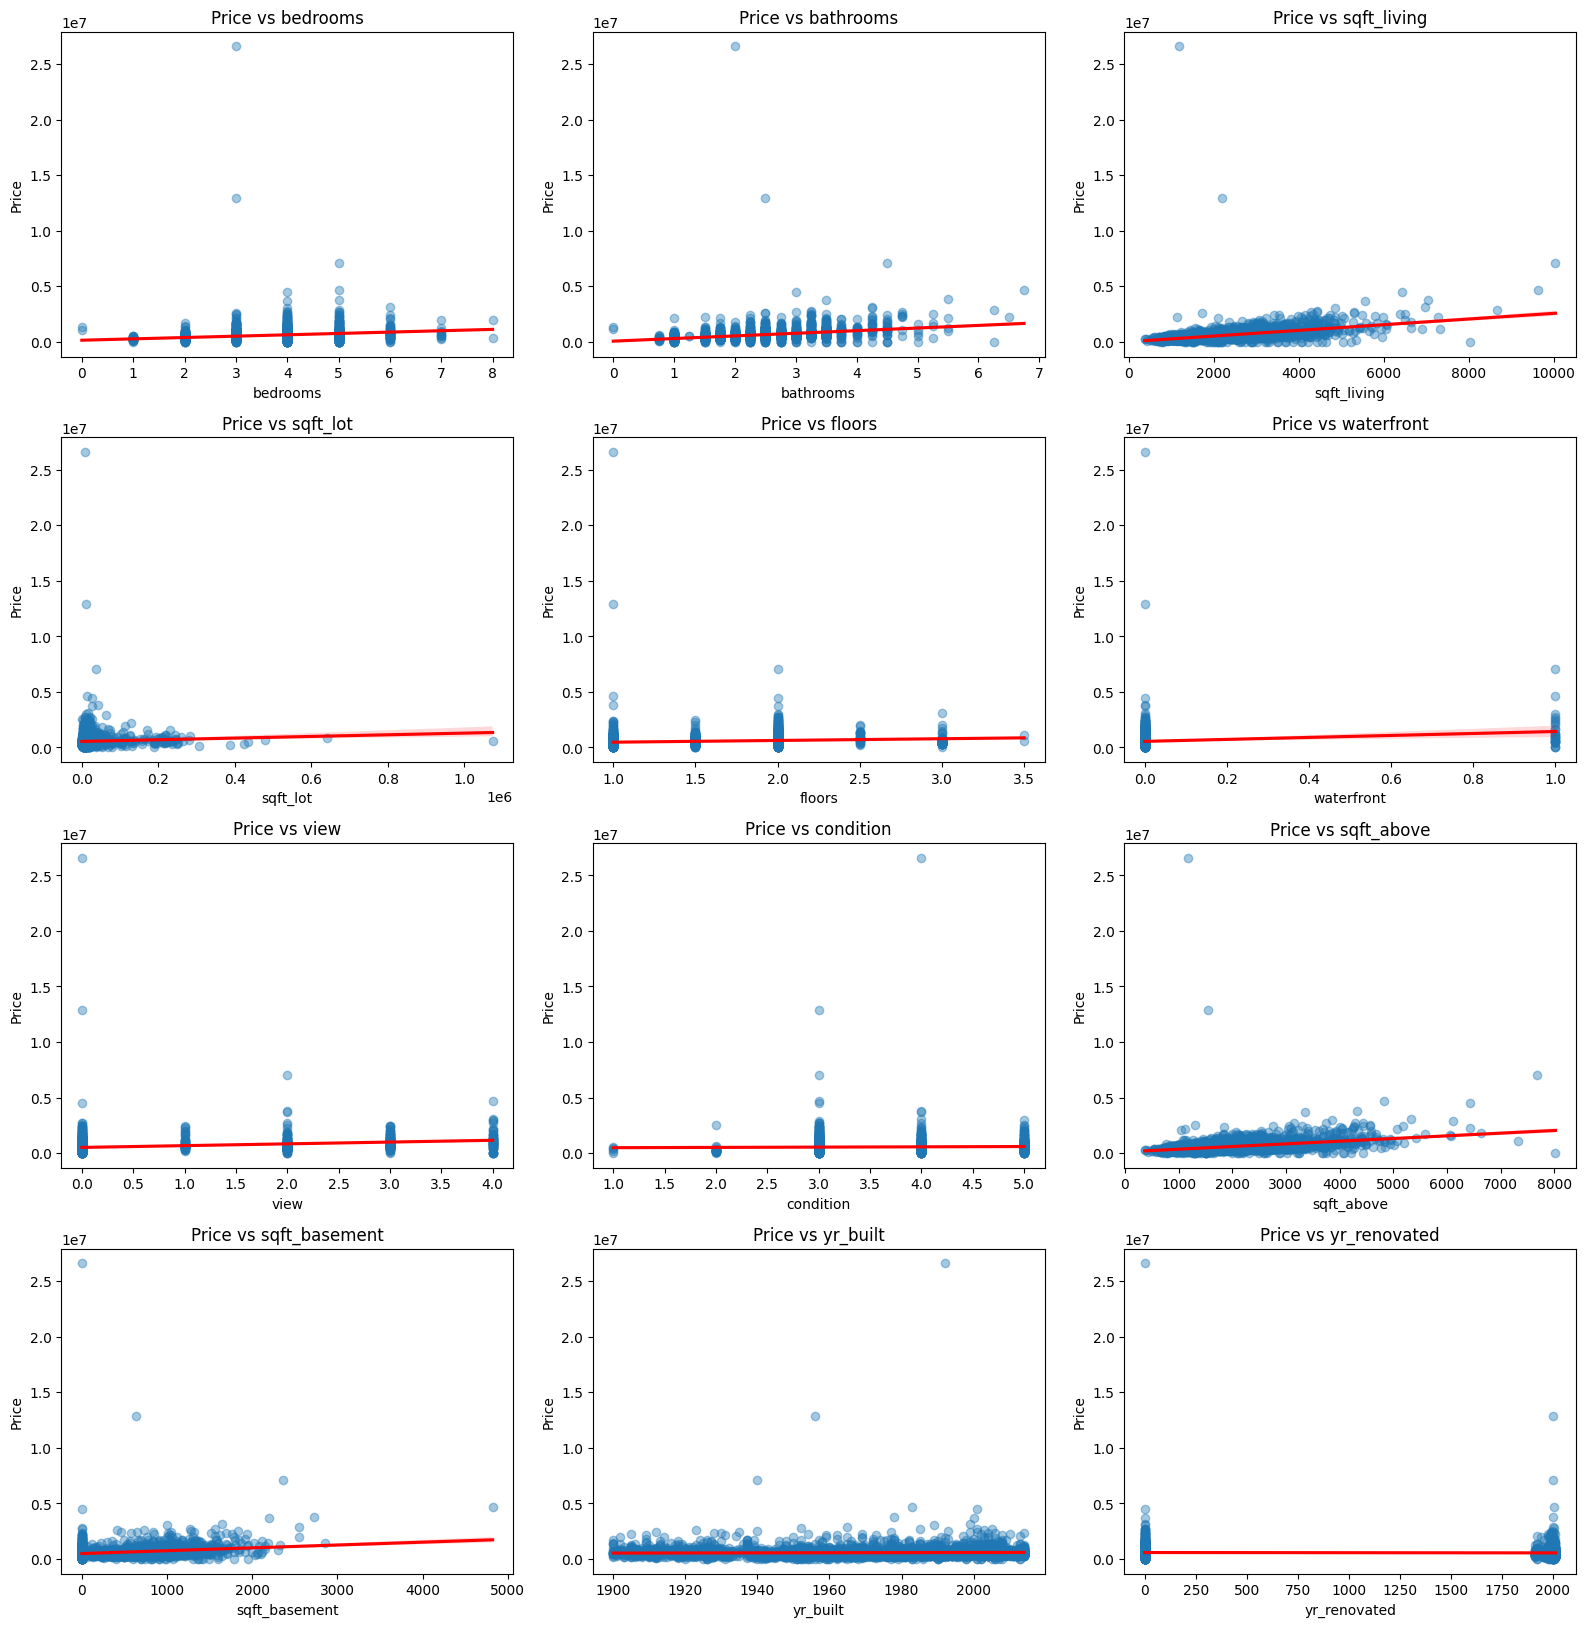

In [39]:
# Regression plots of price vs all numeric features

numeric_cols = DataFrame_Sample.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop('price')  # exclude target

# Create regression plots
plt.figure(figsize=(16, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 3, i)
    sns.regplot(x=DataFrame_Sample[col], y=DataFrame_Sample['price'], scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"Price vs {col}")

plt.tight_layout()
plt.show()

##### Based on our plots we discover that house price increases strongly with living area (sqft_living) and bathrooms, moderately with bedrooms and floors, while lot size and year built show weaker or noisier relationships.

#### **Average price per city**

##### We will check average price per each city

/tmp/ipython-input-1147448984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_price.values, y=city_avg_price.index, palette="viridis")


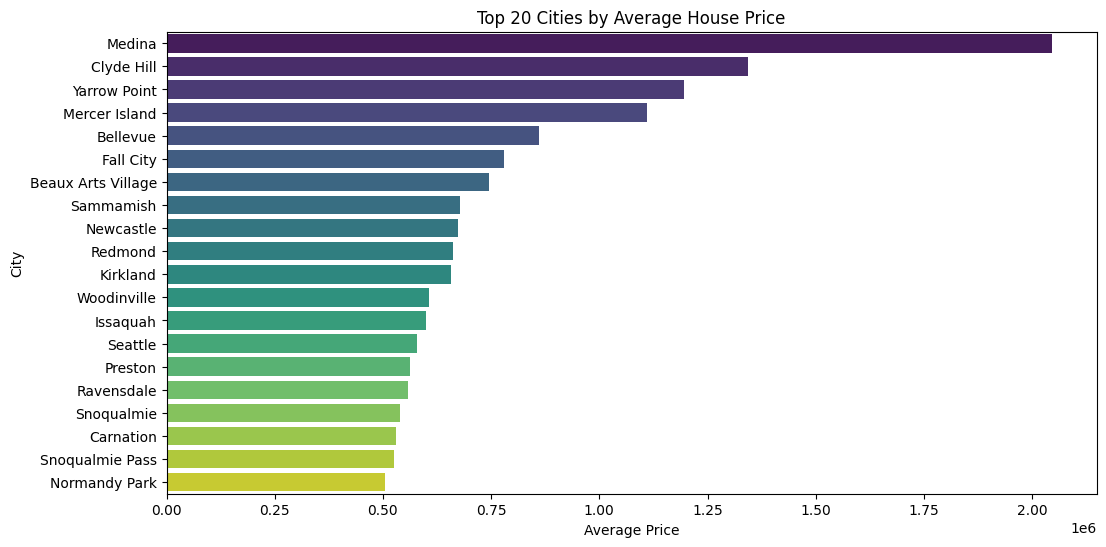

In [40]:
# Calculate average house price by city
city_avg_price = DataFrame_Sample.groupby('city')['price'].mean().sort_values(ascending=False).head(20)

# Plot top 20 cities
plt.figure(figsize=(12,6))
sns.barplot(x=city_avg_price.values, y=city_avg_price.index, palette="viridis")
plt.title("Top 20 Cities by Average House Price")
plt.xlabel("Average Price")
plt.ylabel("City")
plt.show()

##### Average house prices vary greatly by city, with certain locations commanding much higher premiums, confirming the importance of geography in property valuation. The EDA reveals that house prices are highly skewed with strong dependence on living area, bathrooms, and location, while categorical and geospatial analyses confirm that property condition, waterfront presence, and city drive significant variations in market value.

### **Feature Engineering**

##### Feature engineering involves handling missing values, extracting date features, creating new metrics (price per sqft, house age, renovation flag), encoding categorical variables, and dropping high-cardinality irrelevant columns.

In [41]:
def remove_outliers_zscore(df, threshold=3):
    df = DataFrame.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        z_scores = np.abs(stats.zscore(df[col]))
        df = df[z_scores < threshold]
    return df

DataFrame_Sample = remove_outliers_zscore(DataFrame_Sample)
DataFrame_Sample.shape

(3742, 18)

##### This function removes rows from a DataFrame where numeric column values have z-scores beyond a given threshold (default = 3), effectively filtering out statistical outliers.


### **Date features**

##### Let’s turn date into a real datetime, create year/month sold features, and print a sample.

In [42]:
DataFrame_Sample['date'] = pd.to_datetime(DataFrame_Sample['date'])
DataFrame_Sample['year_sold'] = DataFrame_Sample['date'].dt.year
DataFrame_Sample['month_sold'] = DataFrame_Sample['date'].dt.month
print(DataFrame_Sample[['date', 'year_sold', 'month_sold']].head())

        date  year_sold  month_sold
0 2014-05-09       2014           5
3 2014-05-09       2014           5
4 2014-05-10       2014           5
5 2014-05-10       2014           5
6 2014-05-10       2014           5


#### **New features**

##### Let’s add price per sqft, house age, and a renovated flag, then preview a few rows.

In [43]:
DataFrame_Sample['price_per_sqft'] = DataFrame_Sample['price'] / DataFrame_Sample['sqft_living']
DataFrame_Sample['house_age'] = DataFrame_Sample['year_sold'] - DataFrame_Sample['yr_built']
DataFrame_Sample['renovated'] = DataFrame_Sample['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
print(DataFrame_Sample[['price_per_sqft', 'house_age', 'renovated']].head())

   price_per_sqft  house_age  renovated
0      280.597015          6          0
3      324.649299          7          0
4      179.705882         35          0
5      150.234742         11          0
6      347.222222         93          1


##### Feature engineering added date-based, price-per-sqft, age, and renovation features, while encoding categorical variables and removing non-informative columns to prepare the dataset for modeling.

In [44]:
DataFrame_Sample['renovated'] = DataFrame_Sample['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

##### It creates a new binary column renovated where 1 means the house was renovated and 0 means it was not.

In [45]:
DataFrame_Sample['date'] = pd.to_datetime(DataFrame_Sample['date'])
DataFrame_Sample['year'] = DataFrame_Sample['date'].dt.year.astype(int)
DataFrame_Sample['month'] = DataFrame_Sample['date'].dt.month.astype(int)

##### Let converts the date column to datetime format and then extracts the year and month into new integer columns.

In [46]:
DataFrame_Sample.drop(columns=['street','country','statezip', 'date'], inplace=True)

In [47]:
encoder = LabelEncoder()
DataFrame_Sample['city'] = encoder.fit_transform(DataFrame_Sample[['city']])

joblib.dump(encoder, "encoder.joblib")

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['encoder.joblib']

##### Let’s use a LabelEncoder to turn the city column into numeric codes, and then save our encoder as encoder.joblib so we can reuse it later.

In [48]:
display(DataFrame_Sample)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_built,yr_renovated,city,year_sold,month_sold,price_per_sqft,house_age,renovated,year,month
0,376000.000000,3.0,2.00,1340,1384,3.0,0,0,3,1340,...,2008,0,34,2014,5,280.597015,6,0,2014,5
3,324000.000000,3.0,2.25,998,904,2.0,0,0,3,798,...,2007,0,34,2014,5,324.649299,7,0,2014,5
4,549900.000000,5.0,2.75,3060,7015,1.0,0,0,5,1600,...,1979,0,34,2014,5,179.705882,35,0,2014,5
5,320000.000000,3.0,2.50,2130,6969,2.0,0,0,3,2130,...,2003,0,20,2014,5,150.234742,11,0,2014,5
6,875000.000000,4.0,2.00,2520,6000,1.0,0,0,3,1400,...,1921,2007,34,2014,5,347.222222,93,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1954,1979,34,2014,7,204.083885,60,1,2014,7
4136,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,1983,2009,3,2014,7,365.981735,31,1,2014,7
4137,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,2009,0,31,2014,7,138.506368,5,0,2014,7
4138,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,1974,0,34,2014,7,97.320574,40,0,2014,7


##### Let’s clean our data by keeping only houses with a reasonable living area and lot size, while removing extreme outliers.


In [49]:
DataFrame_Sample[DataFrame_Sample['sqft_living'] < 370]
DataFrame_Sample = DataFrame_Sample[(DataFrame_Sample['sqft_living'] > 300) &
        (DataFrame_Sample['sqft_living'] < DataFrame_Sample['sqft_living'].quantile(0.99)) &
        (DataFrame_Sample['sqft_lot'] < DataFrame_Sample['sqft_lot'].quantile(0.99))]

##### Let’s filter the DataFrame so we only keep rows where the number of bedrooms isn’t zero.


In [51]:
DataFrame_Sample = DataFrame_Sample[~((DataFrame_Sample['bedrooms'] == 0))]

##### Let’s filter the DataFrame so we only keep rows where the price is between the 1st and 99th percentile — that way we remove extreme outliers.


In [ ]:
DataFrame_Sample = DataFrame_Sample[ (DataFrame_Sample['price'] < DataFrame_Sample['price'].quantile(0.99)) & (DataFrame_Sample['price'] > DataFrame_Sample['price'].quantile(0.01)) ]

##### Let’s filter the DataFrame so we only keep rows where the price falls between the 1st and 99th percentile, helping us remove extreme outliers.

##### Let’s standardize our numeric columns so they’re on the same scale, and then save the scaler for future use.

In [53]:
scaler = StandardScaler()
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

DataFrame_Sample[num_cols] = scaler.fit_transform(DataFrame_Sample[num_cols])
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [55]:
DataFrame_Sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3666 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           3666 non-null   float64
 1   bedrooms        3666 non-null   float64
 2   bathrooms       3666 non-null   float64
 3   sqft_living     3666 non-null   float64
 4   sqft_lot        3666 non-null   float64
 5   floors          3666 non-null   float64
 6   waterfront      3666 non-null   int64  
 7   view            3666 non-null   int64  
 8   condition       3666 non-null   int64  
 9   sqft_above      3666 non-null   float64
 10  sqft_basement   3666 non-null   float64
 11  yr_built        3666 non-null   float64
 12  yr_renovated    3666 non-null   float64
 13  city            3666 non-null   int64  
 14  year_sold       3666 non-null   int32  
 15  month_sold      3666 non-null   int32  
 16  price_per_sqft  3666 non-null   float64
 17  house_age       3666 non-null   int64 

##### Let’s split our data into features (X) and target (y), then divide it into training and testing sets — with 80% for training and 20% for testing

In [56]:
X = DataFrame_Sample.drop(columns=['price'])
y = DataFrame_Sample['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Let’s print out the shapes of our training and testing sets so we can check that the split looks correct.

In [57]:
print(f"X Train Shape:{X_train.shape}")
print(f"X Test Shape:{X_test.shape}")
print(f"y Train Shape:{y_train.shape}")
print(f"y Train Shape:{y_test.shape}")

X Train Shape:(2932, 20)
X Test Shape:(734, 20)
y Train Shape:(2932,)
y Train Shape:(734,)


###### Let’s build an XGBoost regression model with our chosen parameters and train it on the training data, while also checking performance on the validation set.

In [59]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

model = XGBRegressor(
    max_depth=6,
    learning_rate=0.01,
    n_estimators=5000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5000,
             n_jobs=None, num_parallel_tree=None, ...)

###### Let’s use our trained model to make predictions on the test set.

In [60]:
y_pred = model.predict(X_test)

###### Let’s check how well our model fits the training data by calculating its R² score.

In [62]:
model.score(X_train, y_train)

0.999127669292183

###### Let’s evaluate our model on the test set by checking its R² score — this tells us how well it generalizes to unseen data.

In [63]:
model.score(X_test, y_test)

0.9907792096558354

###### Let’s evaluate our model’s performance on the test set by printing three key metrics: R² score (how well the model explains variance), MAE (average absolute error), and MSE (average squared error).

In [64]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9907792096558354
10823.826110226328
533066103.40254784


#### **Building a Wrapper Class for Price Predictions with Contextual Bounds**

##### Let’s build a wrapper class that not only predicts a house price but also shows us the closest lower and upper price examples from the dataset for context.

In [68]:
class PriceModelWithBounds:
    def __init__(self, model, reference_df, price_col="price"):
        """
        Wrap a trained model so it predicts price and also
        returns the closest lower/upper rows from the reference dataset.

        model: trained regression model
        reference_df: original DataFrame with historical house data
        price_col: name of the column holding house prices
        """
        self.model = model
        self.reference_df = reference_df.copy()
        self.price_col = price_col

    def predict_with_bounds(self, X):
        """Predict price and return dict with lower, upper, predicted."""
        # Predict
        predicted_price = float(self.model.predict(X)[0])

        # Find closest lower/upper
        df = self.reference_df
        lower_df = df[df[self.price_col] < predicted_price]
        upper_df = df[df[self.price_col] > predicted_price]

        lower_row = None if lower_df.empty else lower_df.loc[[lower_df[self.price_col].idxmax()]]
        upper_row = None if upper_df.empty else upper_df.loc[[upper_df[self.price_col].idxmin()]]

        return {
            "lower": lower_row,
            "upper": upper_row,
            "Predicted Price": round(predicted_price, 2)
        }

###### Let’s create a bundle that includes our trained model, the reference DataFrame, and the price column name then save it as a compressed .joblib file for future use.

In [70]:
bundle = {
    "model": model,
    "reference_df": DataFrame,
    "price_col": "price",
}
joblib.dump(bundle, "xgb_price_bundle.joblib", compress=3)

['xgb_price_bundle.joblib']

### **Forecasting 5 Years with Time Series**

##### We clean the data, compute monthly median prices, fit a SARIMAX model, forecast the next 5 years, and plot both the observed values and forecast with confidence intervals.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


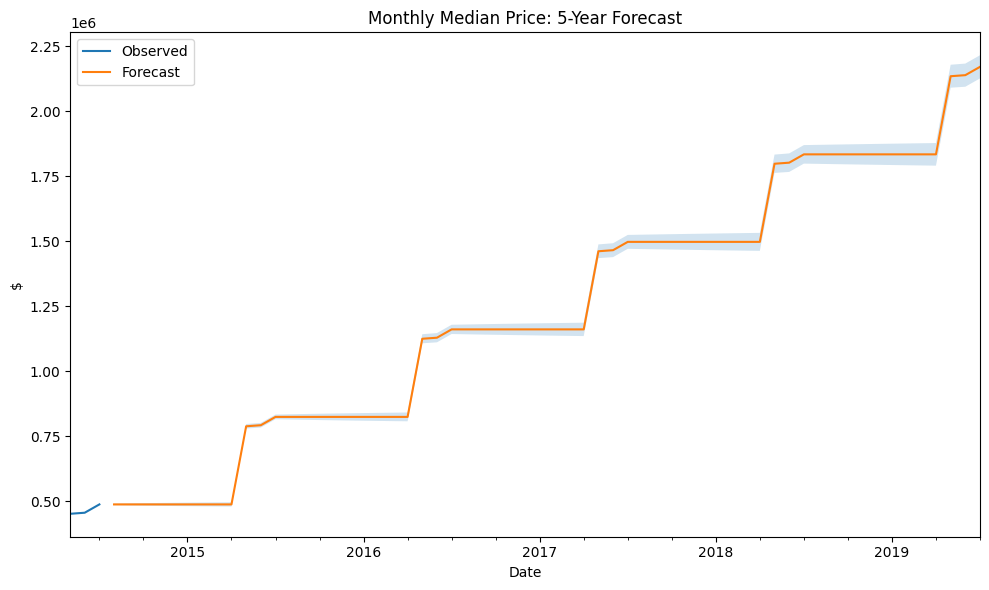

In [71]:
df_ts = DataFrame.copy()
df_ts['updateDate'] = pd.to_datetime(df_ts['date'], errors='coerce')
df_ts = df_ts.dropna(subset=['updateDate', 'price'])

monthly = (df_ts
           .set_index('updateDate')['price']
           .resample('MS').median()
           .ffill())

model = SARIMAX(monthly, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

pred = res.get_forecast(steps=60)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# --- Plot ---
plt.figure(figsize=(10,6))
monthly.plot(label="Observed")
pred_mean.plot(label="Forecast")
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], alpha=0.2)
plt.title("Monthly Median Price: 5-Year Forecast")
plt.xlabel("Date"); plt.ylabel("$")
plt.legend(); plt.tight_layout()

#### **Forecast**

##### We’re first making sure the date column is in proper datetime format and removing any rows where date or price is missing. Then, we calculate the monthly median price, fill any gaps, and use a SARIMAX model to forecast the next 60 months. Finally, we combine the forecasted values with their 80% confidence intervals, add Year and Month columns for readability, and print out the first 12 rows of the forecasted results.

In [72]:
DataFrame['date'] = pd.to_datetime(DataFrame['date'], errors='coerce')
df = DataFrame.dropna(subset=['date', 'price'])

# Monthly median price
monthly = (df.set_index('date')['price']
             .resample('MS').median()
             .ffill())

# Fit SARIMAX
model = SARIMAX(monthly, order=(1,1,1), seasonal_order=(1,1,1,12),
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

steps = 60
pred = res.get_forecast(steps=steps)
pred_mean = pred.predicted_mean.rename("Forecast")
pred_ci = pred.conf_int(alpha=0.20)  # 80% CI
pred_ci.columns = ["Lower CI", "Upper CI"]

forecast_df = pd.concat([pred_mean, pred_ci], axis=1).reset_index()
forecast_df['Year'] = forecast_df['index'].dt.year
forecast_df['Month'] = forecast_df['index'].dt.strftime('%b')
forecast_df = forecast_df.rename(columns={'index': 'Date'})

print(forecast_df.head(12))

         Date  Forecast       Lower CI       Upper CI  Year Month
0  2014-08-01  487000.0  485187.611942  488812.388058  2014   Aug
1  2014-09-01  487000.0  484436.896228  489563.103772  2014   Sep
2  2014-10-01  487000.0  483860.851801  490139.148199  2014   Oct
3  2014-11-01  487000.0  483375.223884  490624.776116  2014   Nov
4  2014-12-01  487000.0  482947.377101  491052.622899  2014   Dec
5  2015-01-01  487000.0  482560.574042  491439.425958  2015   Jan
6  2015-02-01  487000.0  482204.871919  491795.128081  2015   Feb
7  2015-03-01  487000.0  481873.792456  492126.207544  2015   Mar
8  2015-04-01  487000.0  481562.835826  492437.164174  2015   Apr
9  2015-05-01  787600.0  781916.687006  793283.312994  2015   May
10 2015-06-01  791700.0  785873.987415  797526.012585  2015   Jun
11 2015-07-01  823700.0  817873.987274  829526.012726  2015   Jul


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
